Importing Libraries

In [6]:
from huggingface_hub.keras_mixin import keras
import torch.nn.functional as F
from torchvision.datasets import ImageFolder, ImageNet
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, random_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from PIL import Image
import os
from sklearn.metrics import f1_score

Data Preperation

In [7]:
data_dir=r'C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\Garbage classification'
data=ImageFolder(data_dir)

In [8]:
image,label = data[5]

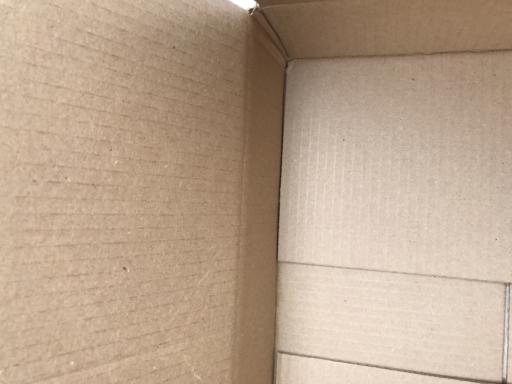

In [9]:
image

In [10]:
print(label)

0


Data Cleaning & Preprocessing

In [11]:
data_dir=r'C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\Garbage classification'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
data=ImageFolder(data_dir, transform=transform)

EDA

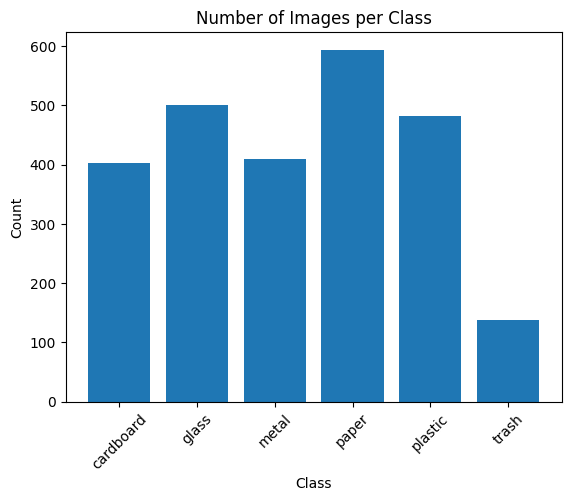

In [12]:
import os
import matplotlib.pyplot as plt

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls)))
                for cls in os.listdir(data_dir)}

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


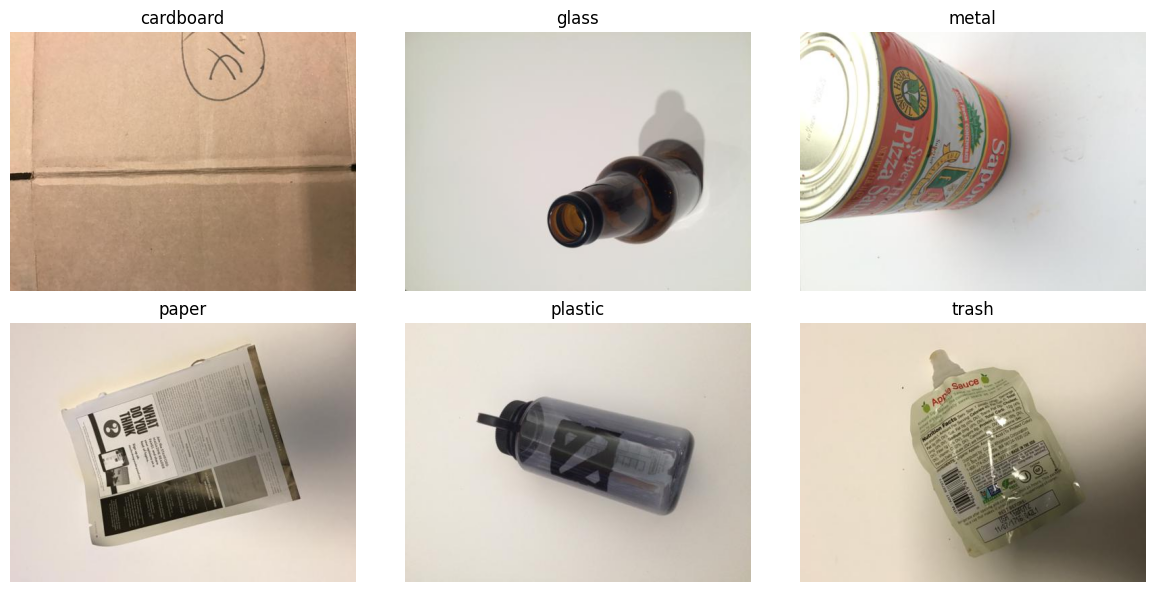

In [13]:
import matplotlib.image as mpimg

plt.figure(figsize=(12, 6))
for i, cls in enumerate(os.listdir(data_dir)):
    img_path = os.path.join(data_dir, cls, os.listdir(os.path.join(data_dir, cls))[0])
    img = mpimg.imread(img_path)

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [15]:
target_to_class={v:k for k,v in ImageFolder(data_dir).class_to_idx.items()}
target_to_class

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [16]:
train_data,test_data = train_test_split(data,test_size=0.2,random_state=42)

In [17]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

In [18]:
for images,labels in train_loader:
    break
images.shape,labels.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64]))

Model Training

In [19]:
img_size = (128, 128)   # resize all images
batch_size = 32

data_dir=r'C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\Garbage classification'
# Training set (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,                # path to main folder
    validation_split=0.2,     # 20% will be used for validation
    subset="training",
    seed=42,                  # make split reproducible
    image_size=img_size,
    batch_size=batch_size
)


# Test set (20%)
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [20]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [21]:
num_classes = 6  # since you have 6 folders

model = models.Sequential([
    #layers.Rescaling(1./255, input_shape=(128,128,3)),  # normalize pixels

    layers.Conv2D(32, (3,3), activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
    ])

C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\01_Project\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.2418 - loss: 654.2736 - val_accuracy: 0.2515 - val_loss: 1.7058
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.2776 - loss: 1.6769 - val_accuracy: 0.2436 - val_loss: 1.7085
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.2911 - loss: 1.6141 - val_accuracy: 0.2554 - val_loss: 1.7735
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.3442 - loss: 1.5427 - val_accuracy: 0.2515 - val_loss: 1.9526
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.3753 - loss: 1.4824 - val_accuracy: 0.2713 - val_loss: 2.0613


In [24]:
img_path = r'C:\Users\shogi\Downloads\shipping-cotton-box.jpg'
image = Image.open(img_path).convert("RGB")
image = transform(image).unsqueeze(0)
image = image.permute(0, 2, 3, 1).numpy()

In [25]:
outputs = model(image)
predicted_class = tf.argmax(outputs, axis=1).numpy()
print("Predicted class index:", predicted_class[0])

Predicted class index: 0


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [65]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(SimpleCNN, self).__init__()
        # Convolutions

        self.conv1 = nn.Conv2d(3, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1   = nn.Linear(64 * 32 * 32, 256)  # depends on resize size
        self.fc2   = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [66]:
model = SimpleCNN().to(device)

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [68]:
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/10, Loss: 2.7552
Epoch 2/10, Loss: 1.6341
Epoch 3/10, Loss: 1.4343
Epoch 4/10, Loss: 1.3224
Epoch 5/10, Loss: 1.2380
Epoch 6/10, Loss: 1.1370
Epoch 7/10, Loss: 1.0312
Epoch 8/10, Loss: 0.8853
Epoch 9/10, Loss: 0.7365
Epoch 10/10, Loss: 0.6445


In [69]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# F1 score (macro, micro or weighted)
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 (micro):", f1_score(y_true, y_pred, average='micro'))
print("F1 (weighted):", f1_score(y_true, y_pred, average='weighted'))

F1 (macro): 0.5157521347620249
F1 (micro): 0.5434782608695652
F1 (weighted): 0.5433243960006867


In [70]:
# Create a folder to save
save_path = r"C:\Users\shogi\Desktop\saved_models"
os.makedirs(save_path, exist_ok=True)

# Save weights only (recommended)
torch.save(model.state_dict(), os.path.join(save_path, "garbage_model.pth"))
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [71]:
# Recreate the same architecture (must match training)
model = SimpleCNN(num_classes=6)
save_path = r"C:\Users\shogi\Desktop\saved_models"
# Load weights
model.load_state_dict(torch.load(os.path.join(save_path, "garbage_model.pth")))
model.eval()   # set to evaluation mode
print("✅ Model loaded and ready for prediction!")


✅ Model loaded and ready for prediction!


In [60]:
# Same transform as training


# Load image
img_path = r'C:\Users\shogi\Downloads\shipping-cotton-box.jpg'
img = Image.open(img_path).convert("RGB")

# Preprocess
img_t = transform(img).unsqueeze(0)  # add batch dimension

# Predict
with torch.no_grad():
    outputs = model(img_t)
    _, pred = torch.max(outputs, 1)

print("Predicted class index:", pred.item())


Predicted class index: 4


In [61]:
dataset = ImageFolder(r"C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\Garbage classification",
                      transform=transform)

print("Classes:", dataset.classes)
# e.g., ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

predicted_class = dataset.classes[pred.item()]
print("Predicted class name:", predicted_class)


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Predicted class name: plastic


In [178]:
model.eval()

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=6, bias=True)
)

In [179]:
img_path = r'C:\Users\shogi\Downloads\shipping-cotton-box.jpg'
image = Image.open(img_path).convert("RGB")
image = transform(image).unsqueeze(0)  # shape: (1, 3, 64, 64)


In [328]:
with torch.no_grad():                 # no gradients in inference
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)
    print("Predicted class index:", predicted.item())


Predicted class index: 0


In [185]:
print("Predicted label:", data.classes[predicted.item()])


Predicted label: cardboard


In [190]:
from torchvision import models

In [192]:
# Load pretrained ResNet18
resnet = models.resnet50(pretrained=True)

# Freeze all layers (optional, if you only want to train last layer)
for param in resnet.parameters():
    param.requires_grad = False

# Replace final layer (ResNet18 outputs 1000 classes by default)
num_classes = 6   # your dataset
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\shogi/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [03:35<00:00, 476kB/s] 


In [307]:
# Load pretrained ResNet50
resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Freeze base layers
for param in resnet.parameters():
    param.requires_grad = False

# Replace final FC layer
num_classes = 6
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes)
)

In [308]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(),lr =  0.01)

In [309]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [311]:
with torch.no_grad():
    outputs = resnet(image)              # image shape: (1, 3, 224, 224)
    _, predicted = torch.max(outputs, 1)
    print("Predicted:", data.classes[predicted.item()])

Predicted: trash


In [198]:
googlenet = models.googlenet(pretrained=True)

# Freeze all layers (optional)
for param in googlenet.parameters():
    param.requires_grad = False

# Replace final fully connected layer
googlenet.fc = nn.Linear(googlenet.fc.in_features, num_classes)

C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\01_Project\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [199]:
googlenet.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [200]:

with torch.no_grad():
    outputs = googlenet(image)              # image shape: (1, 3, 224, 224)
    _, predicted = torch.max(outputs, 1)
    print("Predicted:", data.classes[predicted.item()])

Predicted: plastic


In [201]:
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all layers (optional)
for param in mobilenet.parameters():
    param.requires_grad = False

# Replace final fully connected layer
mobilenet.classifier[1] = nn.Linear(mobilenet.last_channel, num_classes)

C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\01_Project\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\shogi/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:05<00:00, 2.48MB/s]


In [202]:
mobilenet.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [203]:
with torch.no_grad():
    outputs = mobilenet(image)              # image shape: (1, 3, 224, 224)
    _, predicted = torch.max(outputs, 1)
    print("Predicted:", data.classes[predicted.item()])

Predicted: cardboard


In [204]:
# Load pretrained EfficientNetB0
efficientnet = models.efficientnet_b0(pretrained=True)

# Freeze base layers
for param in efficientnet.parameters():
    param.requires_grad = False

# Replace the classifier
num_classes = 6
in_features = efficientnet.classifier[1].in_features
efficientnet.classifier[1] = nn.Linear(in_features, num_classes)

C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\01_Project\myenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\shogi/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:07<00:00, 3.04MB/s]


In [205]:
efficientnet.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [212]:
with torch.no_grad():
    outputs = efficientnet(image)              # image shape: (1, 3, 224, 224)
    _, predicted = torch.max(outputs, 1)
    print("Predicted:", data.classes[predicted.item()])

Predicted: plastic


Model Evaluation

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, dataloader, device, num_classes):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute metrics
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted')
    rec = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    return acc, prec, rec, f1


Accuracy: 0.2063
Precision: 0.2496
Recall: 0.2063
F1 Score: 0.1696


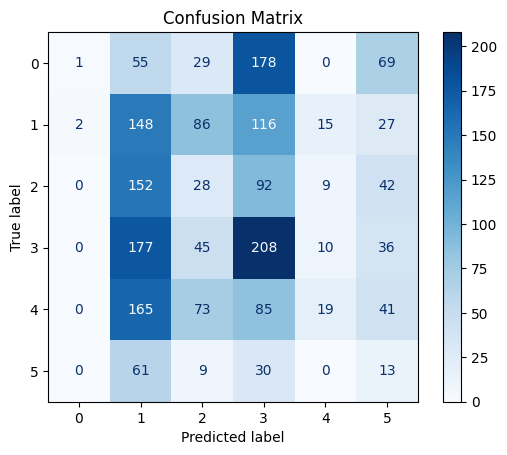

(0.20633349826818406,
 0.24961957541942523,
 0.20633349826818406,
 0.16962860445375197)

In [222]:
evaluate_model(resnet,train_loader,device,num_classes)

Accuracy: 0.6759
Precision: 0.7148
Recall: 0.6759
F1 Score: 0.6691


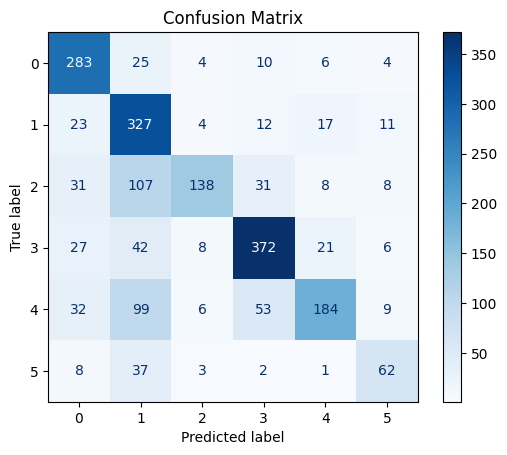

(0.6759030183077684,
 0.7147907703782185,
 0.6759030183077684,
 0.6690906114013291)

In [210]:
evaluate_model(model,train_loader,device,num_classes)

Accuracy: 0.1564
Precision: 0.0727
Recall: 0.1564
F1 Score: 0.0753


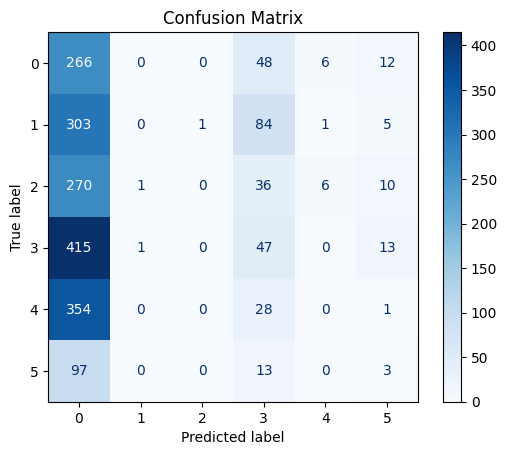

(0.15635823849579417,
 0.07268236758174071,
 0.15635823849579417,
 0.0752855310132398)

In [211]:
evaluate_model(resnet,train_loader,device,num_classes)

Accuracy: 0.1009
Precision: 0.1785
Recall: 0.1009
F1 Score: 0.0999


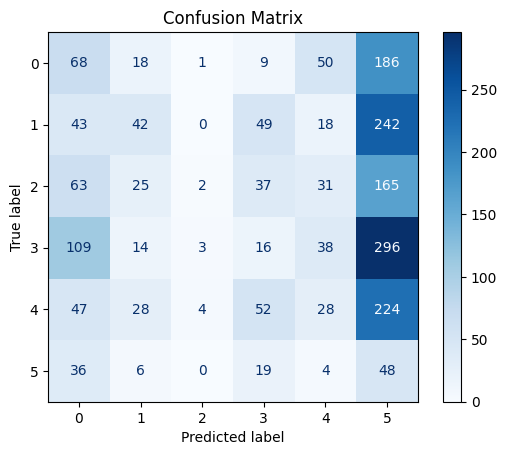

(0.10094012864918357,
 0.17846497897779348,
 0.10094012864918357,
 0.09989472551608554)

In [213]:
evaluate_model(googlenet,train_loader,device,num_classes)

Accuracy: 0.1633
Precision: 0.2876
Recall: 0.1633
F1 Score: 0.1267


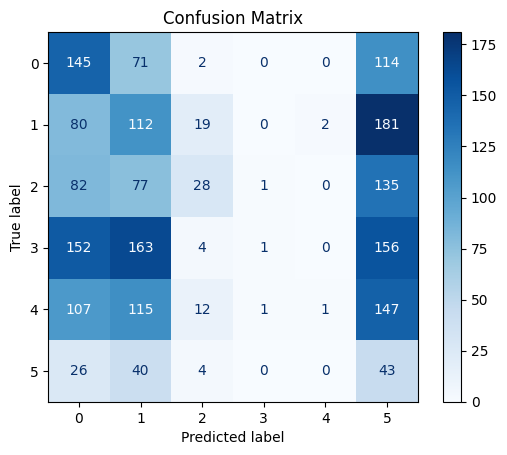

(0.16328550222662047,
 0.28764521690668315,
 0.16328550222662047,
 0.12669156788274372)

In [214]:
evaluate_model(mobilenet,train_loader,device,num_classes)

Accuracy: 0.1549
Precision: 0.1598
Recall: 0.1549
F1 Score: 0.1455


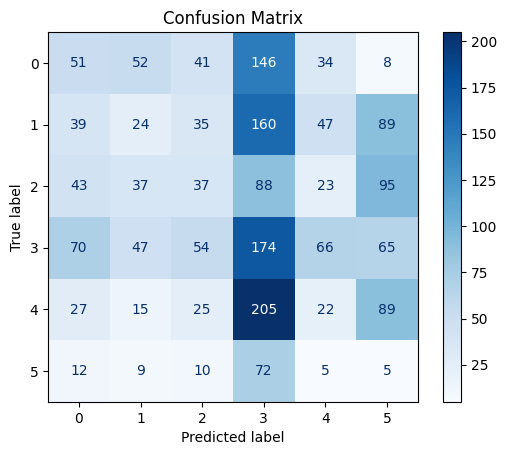

(0.15487382483918852,
 0.15978200944794899,
 0.15487382483918852,
 0.14553700511606554)

In [215]:
evaluate_model(efficientnet,train_loader,device,num_classes)

Streamlit App

In [1]:
%%writefile app.py
import streamlit as st
import torch
from torchvision import models
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import os

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
    ])

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(SimpleCNN, self).__init__()
        # Convolutions

        self.conv1 = nn.Conv2d(3, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1   = nn.Linear(64 * 32 * 32, 256)  # depends on resize size
        self.fc2   = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Recreate the same architecture (must match training)
def predict(img_path):
    model = SimpleCNN(num_classes=6)
    save_path = r"C:\Users\shogi\Desktop\saved_models"
    # Load weights
    model.load_state_dict(torch.load(os.path.join(save_path, "garbage_model.pth")))
    model.eval()   # set to evaluation mode
    img = Image.open(img_path).convert("RGB")
    # Preprocess
    img_t = transform(img).unsqueeze(0)  # add batch dimension

    # Predict
    with torch.no_grad():
        outputs = model(img_t)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        score, pred = torch.max(probs, 1)

    dataset = ImageFolder(r"C:\Users\shogi\Desktop\DS\02_Project\04_Garbage Image Classification\Garbage classification",
                          transform=transform)

    predicted_class = dataset.classes[pred.item()]
    predicted_score = score.item()
    return predicted_class, predicted_score



st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction",
                                  "Prediction", "Creator Info"])


if page == 'Project Introduction':
    st.title("Project Introduction")
    st.subheader("📊 A Streamlit App for Exploring Garbage Image Classification")
    st.write("""
    RecycleVision- Garbage Image Classification Using Deep Learning


    **Database Used:**
    1.  Providers Dataset       : https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification?utm_source=chatgpt.com
    """)

elif page == 'Prediction':
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    UPLOAD_DIR = "uploads"
    os.makedirs(UPLOAD_DIR, exist_ok=True)
    if uploaded_file is not None:
        # Save uploaded file to disk
        file_path = os.path.join(UPLOAD_DIR, uploaded_file.name)
        with open(file_path, "wb") as f:
            f.write(uploaded_file.getbuffer())


        # Open and display
        img = Image.open(file_path)
        st.image(img, caption="Uploaded Image", use_column_width=True)
        predict_class, predict_score= predict(file_path)
        st.subheader(f"Predicted class as {predict_class}")
        st.subheader(f"Predicted score as {predict_score}")

elif page == 'Creator Info':
    st.title("👩‍💻 Creator of this Project")
    st.write("""
    **Developed by:** Shogin M
    **LinkedIn Profile:** https://www.linkedin.com/in/shogin-m-083392169/

    **Skills:**
    Python Scripting, Deep Learning (CNN),
    Image Preprocessing & Augmentation, Transfer Learning,
    Evaluation Metrics, Streamlit App Development
    """)

Overwriting app.py


In [ ]:
!streamlit run "app.py"